# Nanodegree Engenheiro de Machine Learning
## Modelo de Avaliação e Validação
## Projeto 1: Estimando Preços dos Imóveis de Boston

Bem-vindo ao primeiro projeto do Nanodegree de Engenheiro de Machine Learning! Neste Notebook, alguns templates de código estão sendo fornecidos para você, e você irá precisar implementar funcionalidades adicionais para completar este projeto com sucesso. Você não vai precisar modificar o código que foi incluído além do que está sendo pedido. Seções que começam com **'Implementação'** no cabeçalho indicam que o bloco de código seguinte vai exigir que você providencie funcionalidade adicional. Instruções serão fornecidas para cada seção e as especificidades da implementação são marcadas no bloco de código com o comando 'TODO'. Não esqueça de ler as instruções atentamente!

Além do código implementado, haverá questões relacionadas com o projeto e sua implementação que você deve responder. Cada seção em que há uma questão para você responder, ela será precedida por **'Questão X'** no cabeçalho. Leia cada questão cuidadosamente e dê respostas completas no seguinte box de texto que contém **'Resposta: '**. O projeto enviado será avaliado com base nas respostas para cada uma das questões e a implementação que você nos forneceu.  

>**Nota:** Células de Código e de Markdown podem ser executadas utilizando o atalho de teclado **Shift + Enter**. Além disso, as células Markdown podem ser editadas ao clicar normalmente duas vezes na célula para entrar no modo de edição.

## Começando
Neste projeto, você irá avaliar o desempenho e o poder de estimativa de um modelo que foi treinado e testado em dados coletados dos imóveis dos subúrbios de Boston, Massachusetts. Um modelo preparado para esses dados e visto como *bem ajustado* pode ser então utilizado para certas estimativas sobre um imóvel – em particular, seu valor monetário. Esse modelo seria de grande valor para alguém como um agente mobiliário, que poderia fazer uso dessas informações diariamente.

O conjunto de dados para este projeto se origina do [repositório de Machine Learning da UCI](https://archive.ics.uci.edu/ml/datasets/Housing). Os dados de imóveis de Boston foram coletados em 1978 e cada uma das 489 entradas representa dados agregados sobre 14 atributos para imóveis de vários subúrbios de Boston. Para o propósito deste projeto, os passos de pré-processamento a seguir foram feitos para esse conjunto de dados:
- 16 observações de dados possuem um valor `'MEDV'` de 50.0. Essas observações provavelmente contêm **valores ausentes ou censurados** e foram removidas.
- 1 observação de dados tem um valor `'RM'` de 8.78. Essa observação pode ser considerada **aberrante** e foi removida.
- Os atributos `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` são essenciais. O resto dos **atributos irrelevantes** foram excluídos.
- O atributo `'MEDV'` foi **escalonado multiplicativamente** para considerar 35 anos de inflação de mercado.

Execute a célula de código abaixo para carregar o conjunto dos dados dos imóveis de Boston, além de algumas bibliotecas de Python necessárias para este projeto. Você vai saber que o conjunto de dados carregou com sucesso se o seu tamanho for reportado.

In [1]:
# Importar as bibliotecas necessárias para este projeto
import numpy as np
import pandas as pd
import visuals as vs # Supplementary code
from sklearn.cross_validation import ShuffleSplit

# Formatação mais bonita para os notebooks
%matplotlib inline

# Executar o conjunto de dados de imóveis de Boston
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Êxito
print("O conjunto de dados de imóveis de Boston tem {} pontos com {} variáveis em cada.".format(*data.shape))

O conjunto de dados de imóveis de Boston tem 489 pontos com 4 variáveis em cada.


/Users/macbuck/venv/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/macbuck/venv/lib/python3.5/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


## Explorando os Dados
Na primeira seção deste projeto, você fará uma rápida investigação sobre os dados de imóveis de Boston e fornecerá suas observações. Familiarizar-se com os dados durante o processo de exploração é uma prática fundamental que ajuda você a entender melhor e justificar seus resultados.

Dado que o objetivo principal deste projeto é construir um modelo de trabalho que tem a capacidade de estimar valores dos imóveis, vamos precisar separar os conjuntos de dados em **atributos** e **variável alvo**. O **atributos**, `'RM'`, `'LSTAT'` e `'PTRATIO'`, nos dão informações quantitativas sobre cada ponto de dado. A **variável alvo**, `'MEDV'`, será a variável que procuramos estimar. Eles são armazenados em `features` e ` prices`, respectivamente.

### Implementação: Calcular Estatísticas
Para a sua primeira implementação de código, você vai calcular estatísticas descritivas sobre preços dos imóveis de Boston. Dado que o `numpy` já foi importado para você, use essa biblioteca para executar os cálculos necessários. Essas estatísticas serão extremamente importantes depois para analisar várias estimativas resultantes do modelo construído.

Na célula de código abaixo, você precisará implementar o seguinte:
- Calcular o mínimo, o máximo, a média, a mediana e o desvio padrão do `'MEDV'`, que está armazenado em `prices`.
  - Armazenar cada cálculo em sua respectiva variável.

In [2]:
# TODO: Preço mínimo dos dados
minimum_price = np.min(prices)

# TODO: Preço máximo dos dados
maximum_price = np.max(prices)

# TODO: Preço médio dos dados
mean_price = np.mean(prices)

# TODO: Preço mediano dos dados
median_price = np.median(prices)

# TODO: Desvio padrão do preço dos dados
std_price = np.std(prices)

# Mostrar as estatísticas calculadas
print("Estatísticas para os dados dos imóveis de Boston:\n")
print("Preço mínimo: ${:,.2f}".format(minimum_price))
print("Preço máximo: ${:,.2f}".format(maximum_price))
print("Preço médio: ${:,.2f}".format(mean_price))
print("Preço mediano: ${:,.2f}".format(median_price))
print("Desvio padrão dos preços: ${:,.2f}".format(std_price))

Estatísticas para os dados dos imóveis de Boston:

Preço mínimo: $105,000.00
Preço máximo: $1,024,800.00
Preço médio: $454,342.94
Preço mediano: $438,900.00
Desvio padrão dos preços: $165,171.13


### Explorando um pouco mais os dados
Abaixo, vamos explorar um pouco mais os dados antes de avançar para as análises e desenvolver um modelo.

In [3]:
# tamanho e tipos de dados das colunas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
RM         489 non-null float64
LSTAT      489 non-null float64
PTRATIO    489 non-null float64
MEDV       489 non-null float64
dtypes: float64(4)
memory usage: 15.4 KB


In [4]:
# primeiras linhas da base de dados
data.head(15)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
5,6.430,5.21,18.7,602700.0
6,6.012,12.43,15.2,480900.0
7,6.172,19.15,15.2,569100.0
8,5.631,29.93,15.2,346500.0
9,6.004,17.10,15.2,396900.0


In [5]:
# principais estatisticas descritivas do dataset, confirmando os dados encontrados anteriormente
data.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


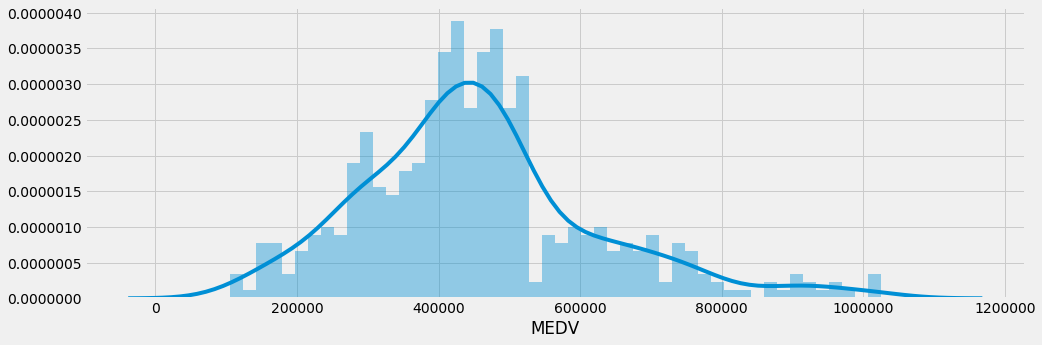

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,5)

# histrograma dos precos
sns.distplot(data['MEDV'], bins=50)

### Questão 1 - Observação de Atributos
Para lembrar, estamos utilizando três atributos do conjunto de dados dos imóveis de Boston: 'RM'`, `'LSTAT'` e `'PTRATIO'`. Para cada observação de dados (vizinhança):
- `'RM'` é o número médio de quartos entre os imóveis na vizinhança.
- `'LSTAT'` é a porcentagem de proprietários na vizinhança considerados de "classe baixa" (proletariado).
- `'PTRATIO'` é a razão de estudantes para professores nas escolas de ensino fundamental e médio na vizinhança.

_Utilizando sua intuição, para cada um dos atributos acima, você acha que um aumento no seu valor poderia levar a um **aumento** no valor do `'MEDV'` ou uma **diminuição** do valor do `'MEDV'`? Justifique sua opinião para cada uma das opções._  
**Dica:** Você espera que um imóvel que tem um valor `'RM'` de 6 custe mais ou menos que um imóvel com valor `'RM'` de 7?

In [7]:
data.sort_values(by='MEDV')

,RM,LSTAT,PTRATIO,MEDV
388,5.683,22.98,20.2,105000.0
381,5.453,30.59,20.2,105000.0
383,5.987,26.77,20.2,117600.0
382,5.852,29.97,20.2,132300.0
472,5.414,23.97,20.1,147000.0
397,4.519,36.98,20.2,147000.0
368,5.277,30.81,20.2,151200.0
384,6.343,20.32,20.2,151200.0
398,6.434,29.05,20.2,151200.0
370,5.000,31.99,20.2,155400.0


In [8]:
data.corr()

,RM,LSTAT,PTRATIO,MEDV
RM,1.000000,-0.612033,-0.304559,0.697209
LSTAT,-0.612033,1.000000,0.360445,-0.760670
PTRATIO,-0.304559,0.360445,1.000000,-0.519034
MEDV,0.697209,-0.760670,-0.519034,1.000000


/Users/macbuck/venv/lib/python3.5/site-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/Users/macbuck/venv/lib/python3.5/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


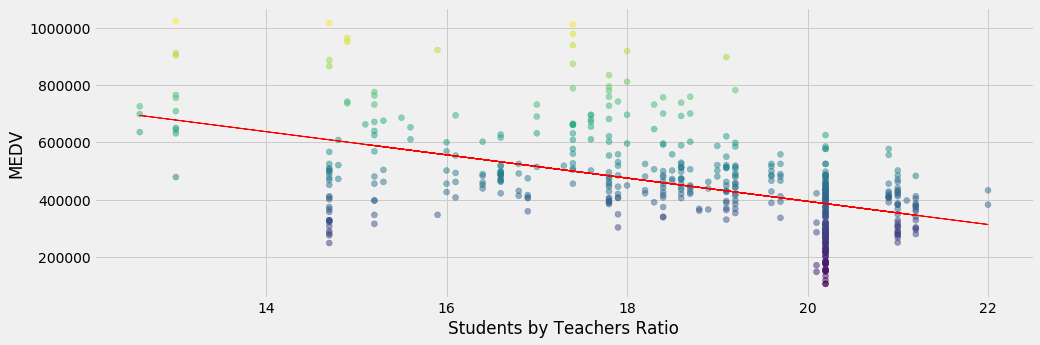

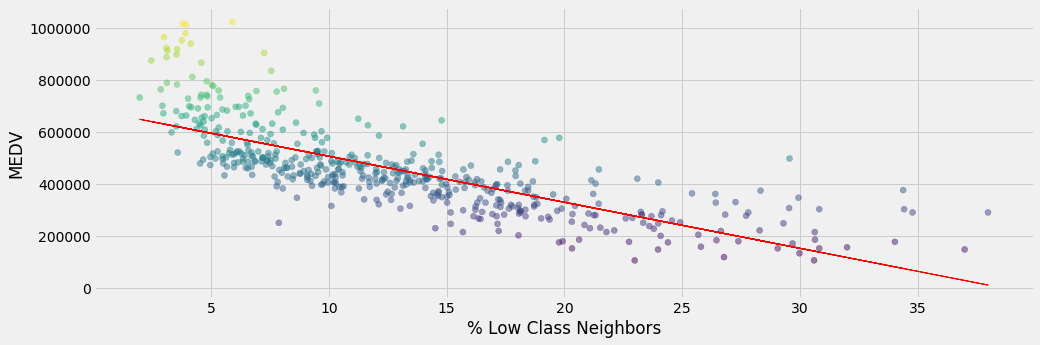

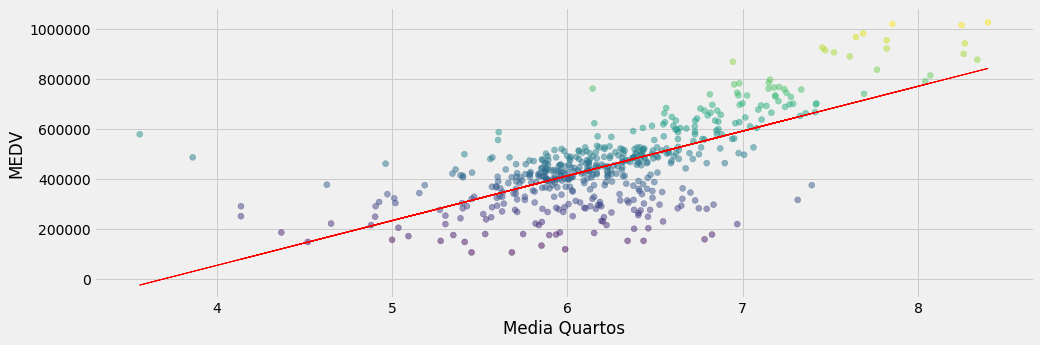

In [9]:
# gráficos de regressão linear
from sklearn.linear_model import LinearRegression

def show_linear_regression(columnName, x_label, y_label):
    reg = LinearRegression()
    column = data[columnName].reshape(-1,1)
    reg.fit(column, prices)
    predictions =  reg.predict(column)
    plt.plot(column, 
             predictions, 
             color='red', 
             linewidth=1)
    plt.scatter(column, 
                prices, 
                alpha=0.5, 
                c=prices)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()
    
show_linear_regression('PTRATIO',"Students by Teachers Ratio",'MEDV')
show_linear_regression('LSTAT',"% Low Class Neighbors",'MEDV')
show_linear_regression('RM',"Media Quartos",'MEDV')

**Resposta: ** Para responder a essa pergunta, inicialmente ordenou-se os dados em função de `'MEDV'` para observar o que pode estar relacionado ao aumento de valor de um imóvel. Através disso, observou-se que o valor do imóvel `'MEDV'` parece aumentar quanto maior or valor de `'RM'` e quanto menores os valores de `'LSTAT'` e `'PTRATIO'`, o que faz sentido, pois:
- `'RM'` é o número médio de quartos entre os imóveis na vizinhança, e faz sentido o valor do imóvel `'MEDV'` aumentar com o aumento dessa variável;
- `'LSTAT'` é a porcentagem de proprietários na vizinhança considerados de "classe baixa" (proletariado), e faz sentido o valor do imóvel `'MEDV'` aumentar com a diminuição dessa variável; 
- `'PTRATIO'` é a razão de estudantes para professores nas escolas de ensino fundamental e médio na vizinhança, e considerando que quanto maior essa variável, menos escolas há na região, faz sentido o valor do imóvel `'MEDV'` aumentar com a diminuição dessa variável.

Na sequência, foi calculada a correlação entre essas variáveis e a regressão linear de cada uma delas com a variável `'MEDV'`, confirmando a relação explicada acima.

----

## Desenvolvendo um Modelo
Na segunda seção deste projeto, você vai desenvolver ferramentas e técnicas necessárias para um modelo que faz estimativas. Ser capaz de fazer avaliações precisas do desempenho de cada modelo através do uso dessas ferramentas e técnicas ajuda a reforçar a confiança que você tem em suas estimativas.

### Implementação: Definir uma Métrica de Desempenho
É difícil medir a qualidade de um modelo dado sem quantificar seu desempenho durante o treinamento e teste. Isso é geralmente feito utilizando algum tipo de métrica de desempenho, através do cálculo de algum tipo de erro, qualidade de ajuste, ou qualquer outra medida útil. Para este projeto, você irá calcular o [*coeficiente de determinação*](https://pt.wikipedia.org/wiki/R%C2%B2), R<sup>2</sup>, para quantificar o desempenho do seu modelo. O coeficiente da determinação para um modelo é uma estatística útil em análise regressa, como se ele frequentemente descrevesse como "good" a capacidade do modelo de fazer estimativas. 

Os valores para R<sup>2</sup> têm um alcance de 0 a 1, que captura a porcentagem da correlação ao quadrado entre a estimativa e o valor atual da **variável alvo**. Um modelo R<sup>2</sup> de valor 0 sempre falha ao estimar a variável alvo, enquanto que um modelo R<sup>2</sup> de valor 1, estima perfeitamente a variável alvo. Qualquer valor entre 0 e 1 indica qual a porcentagem da variável alvo, ao utilizar esse modelo, ele pode ser explicado pelos **atributos**. *Um modelo pode dar também um R<sup>2</sup> negativo, que indica que o modelo não é melhor do que aquele que estima ingenuamente a média da variável alvo.*

Para a função ‘performance_metric’ na célula de código abaixo, você irá precisar implementar o seguinte:
- Utilizar o `r2_score` do `sklearn.metrics` para executar um cálculo de desempenho entre `y_true` e `y_predict`.
- Atribuir a pontuação do desempenho para a variável `score`.

In [11]:
# TODO: Importar 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calcular e retornar a pontuação de desempenho entre 
        valores reais e estimados baseado na métrica escolhida. """
    
    # TODO: Calcular a pontuação de desempenho entre 'y_true' e 'y_predict'
    score = r2_score(y_true, 
                     y_predict)
    
    # Devolver a pontuação
    return score

### Questão 2 - Qualidade do Ajuste
Admita que um conjunto de dados que contém cinco observações de dados e um modelo fez a seguinte estimativa para a variável alvo:

| Valores Reais | Estimativa |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Você consideraria que esse modelo foi capaz de capturar a variação da variável alvo com sucesso? Por que ou por que não?* 

Executar a célula de código abaixo para usar a função `performance_metric’ e calcular o coeficiente de determinação desse modelo.

In [12]:
# Calcular o desempenho deste modelo
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("O coeficiente de determinação, R^2, do modelo é {:.3f}.".format(score))

O coeficiente de determinação, R^2, do modelo é 0.923.


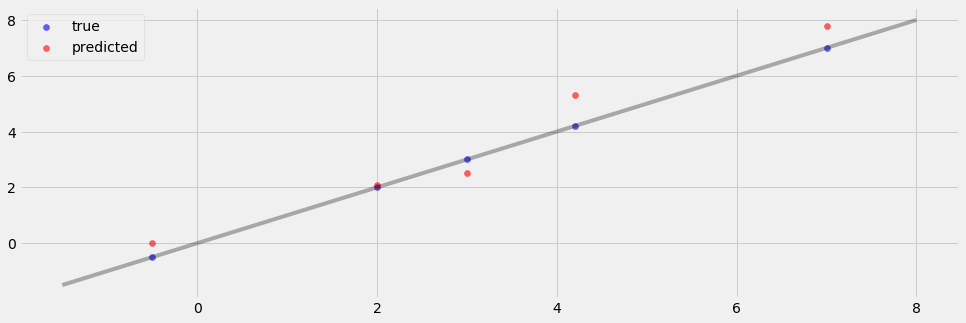

In [13]:
y_true = [3, -0.5, 2, 7, 4.2]
y_predicted = [2.5, 0.0, 2.1, 7.8, 5.3]

# incluindo os valores reais
true_handle = plt.scatter(y_true, 
                          y_true, 
                          alpha=0.6, 
                          color='blue', 
                          label='true')

# incluindo os valores previstos
predicted_handle = plt.scatter(y_true, 
                               y_predicted, 
                               alpha=0.6, 
                               color='red', 
                               label='predicted')

# incluindo linha de referência
fit = np.poly1d(np.polyfit(y_true,y_true,1))
lims = np.linspace(min(y_true) - 1, max(y_true) + 1)
plt.plot(lims, fit(lims), alpha= 0.3, color='black')

# plotando o gráfico
plt.legend(handles=[true_handle, predicted_handle], 
           loc='upper left')
plt.show()

**Resposta:** O R² do modelo é 0,923, isto significa que 92,3% da variabilidade da variável alvo pode ser explicado pelo efeito linear do modelo em questão. Isso significa que podemos afirmar que este modelo foi capaz de capturar a variação da variável com 92,3% de sucesso, o que é uma boa porcentagem, pois o R² está próximo de 100% (ou equivalentemente 1), que é o ideal.

### Implementação: Misturar e Separar os Dados
Sua próxima implementação exige que você pegue o conjunto de dados de imóveis de Boston e divida os dados em subconjuntos de treinamento e de teste. Geralmente os dados são também misturados em uma ordem aleatória ao criar os subconjuntos de treinamento e de teste para remover qualquer viés (ou erro sistemático) na ordenação do conjunto de dados.

Para a célula de código abaixo, você vai precisar implementar o seguinte:
- Utilize `train_test_split` do `sklearn.cross_validation` para misturar e dividir os dados de `features` e `prices` em conjuntos de treinamento e teste.
  - Dividq os dados em 80% treinamento e 20% teste.
  - Mude o `random_state` do `train_test_split` para um valor de sua escolha. Isso garante resultados consistentes.
- Atribuir a divisão de treinamento e teste para X_train`, `X_test`, `y_train` e `y_test`.

In [14]:
# TODO: Importar 'train_test_split'
from sklearn.model_selection import train_test_split

# TODO: Misturar e separar os dados em conjuntos de treinamento e teste
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    prices,
                                                    test_size=0.2, 
                                                    random_state=1)

# Êxito
print("Separação entre treino e teste feita com êxito.")

Separação entre treino e teste feita com êxito.


### Questão 3 - Treinamento e Teste
*Qual o benefício de separar o conjunto de dados em alguma relação de subconjuntos de treinamento e de teste para um algoritmo de aprendizagem?*  
**Dica:** O que pode dar errado se não houver uma maneira de testar seu modelo?

**Resposta: ** Usando subconjuntos de treinamento e de testes podemos validar se o nosso modelo generaliza bem os dados. Do contrário, até poderíamos achar um modelo que tem uma performance muito boa no treinamento, porém não tem um bom desempenho com dados reais. É importante nunca usar os dados de teste para treinamento do modelo.

----

## Analisando o Modelo de Desempenho
Na terceira parte deste projeto, você verá o desempenho em aprendizagem e teste de vários modelos em diversos subconjuntos de dados de treinamento. Além disso, você irá investigar um algoritmo em particular com um parâmetro `'max_depth'` (profundidade máxima) crescente, em todo o conjunto de treinamento, para observar como a complexidade do modelo afeta o desempenho. Plotar o desempenho do seu modelo baseado em critérios diversos pode ser benéfico no processo de análise, por exemplo: para visualizar algum comportamento que pode não ter sido aparente nos resultados sozinhos.

### Curvas de Aprendizagem
A célula de código seguinte produz quatro gráficos para um modelo de árvore de decisão com diferentes níveis de profundidade máxima. Cada gráfico visualiza a curva de aprendizagem do modelo para ambos treinamento e teste, assim que o tamanho do conjunto treinamento aumenta. Note que a região sombreada da curva de aprendizagem denota a incerteza daquela curva (medida como o desvio padrão). O modelo é pontuado em ambos os conjuntos treinamento e teste utilizando R<sup>2</sup>, o coeficiente de determinação.  

Execute a célula de código abaixo e utilizar esses gráficos para responder as questões a seguir.

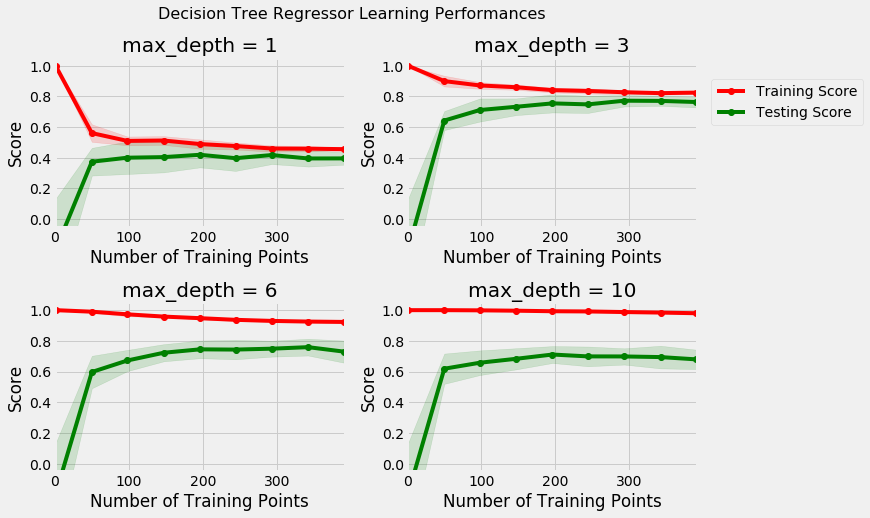

In [15]:
# Criar curvas de aprendizagem para tamanhos de conjunto de treinamento variável e profundidades máximas
vs.ModelLearning(features, 
                 prices)

### Questão 4 - Compreendendo os Dados
*Escolha um dos gráficos acima e determine a profundidade máxima para o modelo. O que acontece com a pontuação da curva de treinamento se mais pontos de treinamento são adicionados? E o que acontece com a curva de teste? Ter mais pontos de treinamento beneficia o modelo?*  
**Dica:** As curvas de aprendizagem convergem para uma pontuação em particular?

**Resposta: **
A **profundidade máxima** para o modelo é igual a **3**, pois é o modelo que generaliza melhor (maior testing score).

De acordo com o gráfico onde `'max_depth = 3'`, conforme mais pontos de treinamento são adicionados mais as curvas de treinamento e de teste convergem para um score de aproximadamente 0,8. Entre 250 e 300 pontos o modelo já está bom. A partir daí, aumentar o tamanho do conjunto de treinamentos não aumentará a precisão do modelo.

### Curvas de Complexidade
A célula de código a seguir produz um gráfico para um modelo de árvore de decisão que foi treinada e validada nos dados de treinamento utilizando profundidades máximas diferentes. O gráfico produz duas curvas de complexidade – uma para o treinamento e uma para a validação. Como a **curva de aprendizagem**, a área sombreada de ambas as curvas de complexidade denota uma incerteza nessas curvas, e o modelo pontuou em ambos os conjuntos de treinamento e validação utilizando a função `performance_metric`.  

Execute a célula de código abaixo e utilize o gráfico para responder as duas questões a seguir.

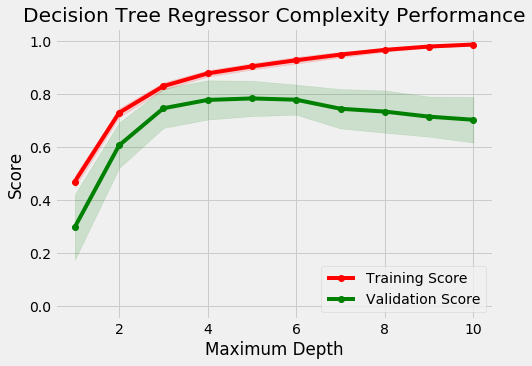

In [16]:
vs.ModelComplexity(X_train, 
                   y_train)

### Questão 5 - Equilíbrio entre viés e variância
*Quando o modelo é treinado com o profundidade máxima 1, será que o modelo sofre mais de viés (erro sistemático) ou variância (erro aleatório)? E o que acontece quando o modelo é treinado com profundidade máxima 10? Quais pistas visuais existem no gráfico para justificar suas conclusões?*  
**Dica:** Como você sabe que um modelo está experimentando viés alto ou variância alta?

**Resposta: ** Alto viés (erro sistemático ou bias) e baixa variância (erro aleatório) são encontrados quando o modelo é simples demais resultando em **Underfitting**, e ele não costuma ter um bom desempenho bom com dados de treinamento e nem de teste. Por outro lado, baixo viés e alta variância são características de um modelo que apresenta **Overfitting** no dados de treinamento fazendo com que seu desempenho com os dados de teste seja ruim.

Em suma, alto viés significa que o modelo não é complexo o suficiente para aprender os padrões dos dados, resultando em baixa performance tanto no conjunto de dados de treinamento quanto de validação. Assim, é possível ver tanto o score de treinamento quanto testes com desempenho ruim. Enquanto isso, alta variância significa que o modelo é complexo demais e aprende padrões a partir de variações aleatórias dos dados, perdendo a capacidade de generalizar dados novos e que resulta em uma baixa performance no conjunto de dados de teste e alta no de treinamento.

Quando o modelo é treinado com profundidade máxima de 1 nota-se um resultado muito ruim tanto no treinamento quanto na validação devido ao alto viés sendo um caso de Underfitting. Já com produndidade 10 vemos um resultado bom no treinamento e ruim na validação denotando o Overfitting. 

### Questão 6 - Modelo Ótimo de Melhor Suposição
*Qual profundidade máxima (`'max_depth'`) você acredita que resulta em um modelo que melhor generaliza um dado desconhecido? Que intuição te levou a essa resposta?*

**Resposta: ** a profundidade máxima que resulta em um modelo que melhor generaliza um dado desconhecido é o de profundidade máxima 4, pois para esse ponto os scores de testes e validação são mais altos e razoavelmente próximos um do outro. 

Mesmo com o alto desempenho de max_depth = 5 eu ainda escolheria o anterior de acordo com a Navalha de Occam [Navalha de Occam](https://pt.wikipedia.org/wiki/Navalha_de_Occam) que aplicado aqui significa basicamente que se duas opções são equivalentes, a mais simples é a correta.

-----

## Avaliando o Desempenho do Modelo
Nesta parte final do projeto, você irá construir um modelo e fazer uma estimativa de acordo com o conjunto de atributos do cliente utilizando um modelo otimizado a partir de `fit_model`.

### Questão 7 - Busca em Matriz
*O que é a técnica de busca em matriz (*grid search*) e como ela pode ser aplicada para otimizar um algoritmo de aprendizagem?*

**Resposta: **

A técnica de *busca em matriz* (grid seasch) é uma maneira tradicional de realizar a otimização do hiperparâmetro através de uma varredura de parâmetros, que é simplesmente uma pesquisa exaustiva através de um subconjunto especificado manualmente do espaço hiperparâmetro de um algoritmo de aprendizagem. O algoritmo de pesquisa de grade deve ser orientado por alguma métrica de desempenho, geralmente medido por validação cruzada no conjunto de treinamento.

Ou seja, a escolha de um modelo consiste em basicamente 3 passos: 

- Treinar vários modelos (com hiperparâmetro diferentes) com os dados de treinamento;
- Usar os dados de validação para escolher com base em um score (F1 score, por exemplo) o melhor modelo;
- Validar o modelo com os dados de teste.

Em suma, a técnica de busca em matriz consiste em fazer uma uma busca exaustiva da combinação de hiperparâmetros que resulta em um modelo com a melhor performance, treinando e testando continuamente todas as combinações de hiperparâmetros.

### Questão 8 - Validação Cruzada
*O que é a técnica de treinamento de validação-cruzada k-fold? Quais benefícios essa técnica proporciona para busca em matriz ao otimizar um modelo?*  
**Dica:** Assim como há um raciocínio por trás de utilizar um conjunto de teste, o que poderia dar errado ao utilizar busca em matriz sem um conjunto de validação cruzada?

**Resposta: **
O método de validação cruzada denominado *k-fold* consiste em dividir o conjunto total de dados em k subconjuntos mutuamente exclusivos do mesmo tamanho e, a partir disto, um subconjunto é utilizado para teste e os k-1 restantes são utilizados para estimação dos parâmetros e calcula-se a acurácia do modelo. Este processo é realizado k vezes alternando de forma circular o subconjunto de teste.

Essa técnica se ajusta muito bem a utilização da busca em matrix sem um conjunto de validação cruzada, pois ao dividir os dados em conjunto de treinamento e conjunto de testes apenas uma vez o tamanho dos conjuntos fica limitado e ao usar um único conjunto de validação pode ocorrer Overfitting.

Resumindo, essa técnica divide o conjunto de dados em k dobras e a cada iteração utiliza uma delas para validação, treinando o modelo com o resto delas e ao final calcula a média da performance de validação.

Assim, o grande benefício de usar a valização-cruzada k-fold na busca em matriz (Grid Search) consiste no o uso do dataset de treinamento como múltiplos datasets de treinamento e teste, evitando que algum viés no conjunto de dados cause uma escolha de hiperparâmetros que funcionem apenas para determinados subconjuntos de treinamento e teste.

### Implementação: Ajustar um Modelo
Na sua última implementação, você vai precisar unir tudo o que foi aprendido e treinar um modelo utilizando o **algoritmo de árvore de decisão**. Para garantir que você está produzindo um modelo otimizado, você treinará o modelo utilizando busca em matriz para otimizar o parâmetro de profundidade máxima (`'max_depth'`) para uma árvore de decisão. Esse parâmetro pode ser entendido como o número de perguntas que o algoritmo de árvore de decisão pode fazer sobre os dados antes de fazer uma estimativa. Árvores de decisão são parte de uma classe de algoritmos chamados *algoritmos de aprendizagem supervisionada*.

Para a função `fit_model` na célula de código abaixo, você vai precisar implementar o seguinte:
- Utilize o [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) do `sklearn.tree` para gerar um objeto regressor de árvore de decisão.
  - Atribua esse objeto à variável `'regressor'`.
- Gere um dicionário para `'max_depth'` com os valores de 1 a 10 e atribua isso para a variável `'params'`.
- Utilize o [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) do `sklearn.metrics` para gerar um objeto de função de pontuação.
  - Passe a função `performance_metric` como um parâmetro para esse objeto.
  - Atribua a função de pontuação à variável `'scoring_fnc'`.
- Utilize o [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) do `sklearn.grid_search` para gerar um objeto de busca por matriz.
  - Passe as variáveis `'regressor'`, `'params'`, `'scoring_fnc'` and `'cv_sets'` como parâmetros para o objeto. 
  - Atribua o objeto `GridSearchCV` para a variável `'grid'`.

In [18]:
# TODO: Importar 'make_scorer', 'DecisionTreeRegressor' e 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Desempenhar busca em matriz sobre o parâmetro the 'max_depth' para uma 
        árvore de decisão de regressão treinada nos dados de entrada [X, y]. """
    
    # Gerar conjuntos de validação-cruzada para o treinamento de dados
    cv_sets = ShuffleSplit(X.shape[0], 
                           n_iter = 10, 
                           test_size = 0.20, 
                           random_state = 0)

    # TODO: Gerar uma árvore de decisão de regressão de objeto
    regressor = DecisionTreeRegressor()

    # TODO: Gerar um dicionário para o parâmetro 'max_depth' com um alcance de 1 a 10
    params = {'max_depth': list(range(1, 11))}

    # TODO: Transformar 'performance_metric' em uma função de pontuação utilizando 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Gerar o objeto de busca em matriz
    grid = GridSearchCV(estimator=regressor, 
                        param_grid=params,
                        scoring=scoring_fnc, 
                        cv=cv_sets)

    # Ajustar o objeto de busca em matriz com os dados para calcular o modelo ótimo
    grid = grid.fit(X, 
                    y)

    # Devolver o modelo ótimo depois de realizar o ajuste dos dados
    return grid.best_estimator_

### Fazendo Estimativas
Uma vez que o modelo foi treinado em conjunto de dados atribuído, ele agora pode ser utilizado para fazer estimativas em novos conjuntos de entrada de dados. No caso do *regressor da árvore de decisão*, o modelo aprendeu *quais são as melhores perguntas sobre a entrada de dados*, e pode responder com uma estimativa para a **variável alvo**. Você pode utilizar essas estimativas para conseguir informações sobre os dados dos quais o valor da variável alvo é desconhecida – por exemplo, os dados dos quais o modelo não foi treinado.

### Questão 9 - Modelo Ótimo
_Qual profundidade máxima do modelo ótimo? Como esse resultado se compara com a sua suposição na **Questão 6**?  

Executar a célula de código abaixo para ajustar o regressor da árvore de decisão com os dados de treinamento e gerar um modelo ótimo.

In [19]:
# Ajustar os dados de treinamento para o modelo utilizando busca em matriz
reg = fit_model(X_train, 
                y_train)

# Produzir valores para 'max_depth'
print("O parâmetro 'max_depth' é {} para o modelo ótimo.".format(reg.get_params()['max_depth']))

O parâmetro 'max_depth' é 6 para o modelo ótimo.


**Resposta: ** A profundidade maxima do modelo ótimo é 5, diferenemente da suposição que fiz na questão 6. Provavelmente, o modelo selecionado foi o com melhor score de validação, e depois o melhor score de treinamento, o que, pelo gráfico da questão 6 realmente é o ponto com `'max_depth = 5'`.

### Questão 10 -Estimando Preços de Venda
Imagine que você era um corretor imobiliário na região de Boston ansioso para utilizar esse modelo que ajuda os imóveis que seus clientes desejam vender. Você coletou as seguintes informações de três dos seus clientes:

| Atributos | Cliente 1 | Cliente 2 | Cliente 3 |
| :---: | :---: | :---: | :---: |
| Número total de quartos em um imóvel | 5 quartos | 4 quartos | 8 quartos |
| Nível de pobreza da vizinhança (em %) | 17% | 32% | 3% |
| Razão estudante:professor das escolas próximas | 15-to-1 | 22-to-1 | 12-to-1 |
*Qual valor você sugeriria para cada um dos seus clientes para a venda de suas casas? Esses preços parecem razoáveis dados os valores para cada atributo?*  
**Dica:** Utilize as estatísticas que você calculou na seção **Explorando Dados** para ajudar a justificar sua resposta.  

Execute a célula de códigos abaixo para que seu modelo otimizado faça estimativas para o imóvel de cada um dos clientes.

Preço estimado para a casa do cliente 1: $424,935.00
             RM      LSTAT    PTRATIO           MEDV
count  20.00000  20.000000  20.000000      20.000000
mean    5.95585  12.883500  19.165000  423885.000000
std     0.26911   3.354998   1.439399    3215.632049
min     5.34400   7.700000  16.000000  420000.000000
25%     5.82825  11.130000  18.350000  421575.000000
50%     5.97750  12.665000  19.150000  423150.000000
75%     6.10300  14.377500  20.200000  426300.000000
max     6.51300  23.090000  21.000000  428400.000000
Até 10 precos similares no Dataset
        RM  LSTAT  PTRATIO      MEDV
13   5.949   8.26     21.0  428400.0
18   5.456  11.69     21.0  424200.0
36   5.841  11.41     19.2  420000.0
46   5.786  14.15     17.9  420000.0
76   6.279  11.97     18.7  420000.0
79   5.874   9.10     18.7  426300.0
104  6.167  12.33     20.9  422100.0
107  6.127  14.09     20.9  428400.0
118  5.872  15.37     17.8  428400.0
121  6.004  14.27     19.1  426300.0
Preço estimado para a casa d

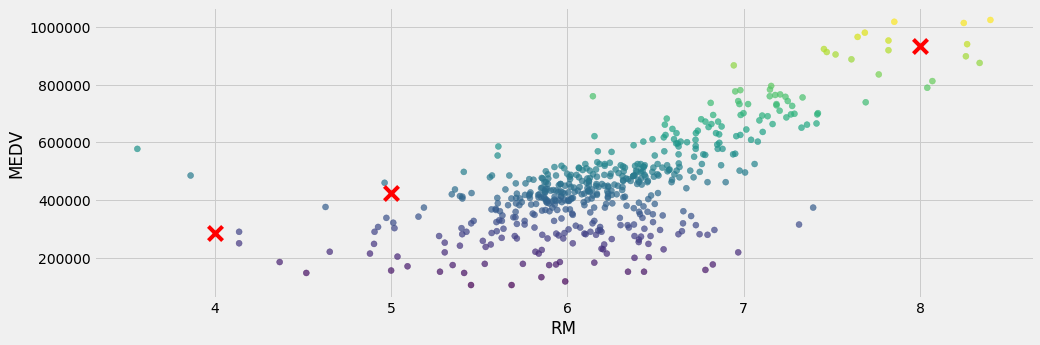

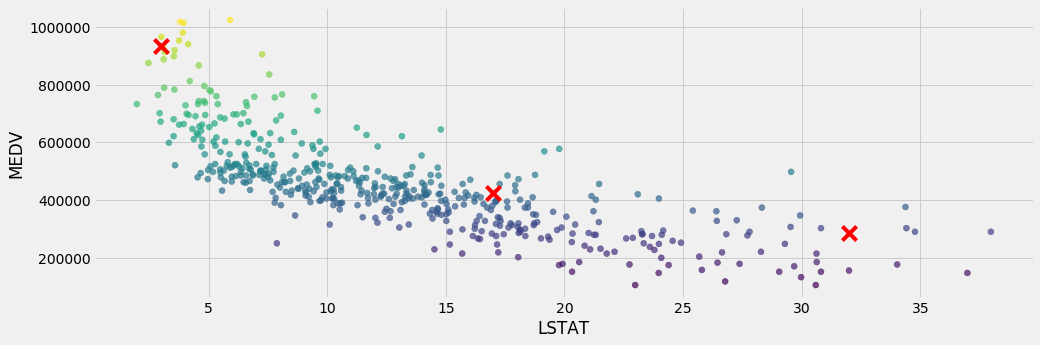

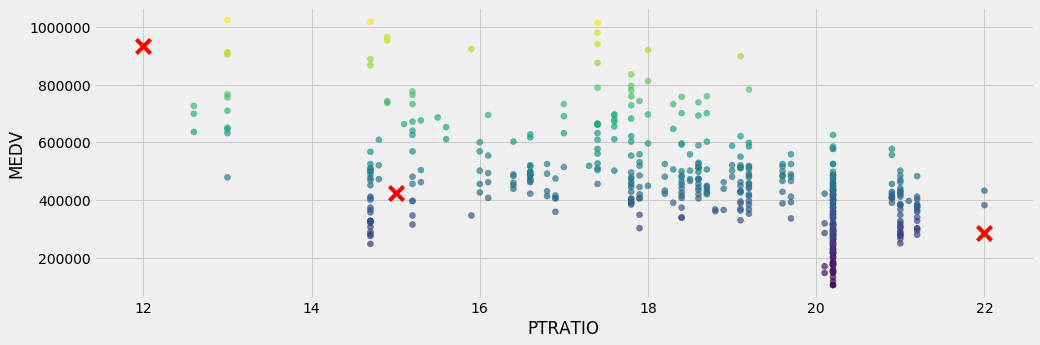

In [20]:
# Gerar uma matriz para os dados do cliente
client_data = [[5, 17, 15], # Cliente 1
               [4, 32, 22], # Cliente 2
               [8, 3, 12]]  # Cliente 3

# Mostrar estimativas
for i, price in enumerate(reg.predict(client_data)):
    print("Preço estimado para a casa do cliente {}: ${:,.2f}".format(i+1, price))
    
    # comparando com valores reais próximos
    df = data[(data['MEDV']>price - 5000) & (data['MEDV']<price + 5000)]
    print(df.describe())
    print('Até 10 precos similares no Dataset')
    print(df.head(10))
    
# plotando
clients = np.transpose(client_data)
predicts = reg.predict(client_data)
for i, feature in enumerate(['RM','LSTAT','PTRATIO']):
    plt.scatter(features[feature], 
                prices, 
                alpha= 0.7, 
                c=prices)
    plt.scatter(clients[i], 
                predicts, 
                color='red', 
                linewidths=2, 
                marker='x', 
                s=200)
    plt.xlabel(feature)
    plt.ylabel('MEDV')
    plt.show()

**Resposta: **
- **Cliente 1**: preço estimado para casa 419,700.00;
    - Analisando-se os preços similares, observa-se que o preço estimado está compatível com outros com características semelhantes do imóvel (`'RM'` em torno de 6, `'LSTAT'` em torno de 13.3% e `'PTRATIO'` em torno de 19.5 para 1). Nos gráficos plotados, ainda é possível verificar que imóveis com as características desse cliente estão na região de 400,000.00.


- **Cliente 2**: preço estimado para casa 287,100.00;
    - Analisando-se os preços similares, observa-se que o preço estimado está compatível com outros com características semelhantes do imóvel (`'RM'` em torno de 5,7, `'LSTAT'` em torno de 22.7% e `'PTRATIO'` em torno de 19.9 para 1). Nos gráficos plotados, ainda é possível verificar que imóveis com as características desse cliente estão na região de 300,000.00.


- **Cliente 3**: preço estimado para casa 927,500.00.
    - Analisando-se os preços similares, observa-se que o preço estimado está compatível com um outro imóvel com características semelhantes do imóvel (`'RM'` de 7,5, `'LSTAT'` de 3,1% e `'PTRATIO'` de 15,9%). Nos gráficos plotados, ainda é possível verificar que imóveis com as características desse cliente estão na região de 900,000.00.


Verificando, portanto, as observações reais no próprio Dataset, conforme mostrado no código acima executado, é possível observar que os valores sugeridos são razoáveis.

### Sensibilidade
Um modelo ótimo não é necessariamente um modelo robusto. Às vezes, um modelo é muito complexo ou muito simples para generalizar os novos dados. Às vezes, o modelo pode utilizar um algoritmo de aprendizagem que não é apropriado para a estrutura de dados especificado. Outras vezes, os próprios dados podem ter informação excessiva ou exemplos insuficientes para permitir que o modelo apreenda a variável alvo – ou seja, o modelo não pode ser ajustado. Execute a célula de código abaixo para rodar a função `fit_model` dez vezes com diferentes conjuntos de treinamento e teste para ver como as estimativas para um cliente específico mudam se os dados foram treinados.

In [21]:
vs.PredictTrials(features, 
                 prices, 
                 fit_model, 
                 client_data)

Trial 1: $391,183.33
Trial 2: $424,935.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $73,357.39


### Questão 11 - Aplicabilidade
*Em poucas linhas, argumente se o modelo construído deve ou não ser utilizado de acordo com as configurações do mundo real.*  
**Dica:** Algumas questões para responder:
- *Quão relevante dados coletados em 1978 podem ser nos dias de hoje?*
- *Os atributos presentes são suficientes para descrever um imóvel?*
- *Esse modelo é robusto o suficiente para fazer estimativas consistentes?*
- *Dados coletados em uma cidade urbana como Boston podem ser aplicados para uma cidade rural?*

**Resposta: **
Considero que o modelo construído nesse projeto não deva ser utilizado para o mundo real. O mostivos são elencados nas respostas de cada uma das questões abaixo.

- *Quão relevante dados coletados em 1978 podem ser nos dias de hoje?*
O que era relevante em 1978 pode não ser tão relevante hoje, especialmente preço de imóveis.

- *Os atributos presentes são suficientes para descrever um imóvel?*
Não, pois podem haver outras (novas) variáveis que influenciam no preço do imóvel (como segurança pública, painéis solares, automação residencial, etc.)

- *Esse modelo é robusto o suficiente para fazer estimativas consistentes?*
Se considerarmos que as features presentes no dataset são suficentes e com um dataset de treinamento maior, esse modelo poderia fazer estimativas consistentes. Mas uma análise de sensibilidade permite observar que a variação entre os preços previstos para um mesmo cliente alterando-se o conjunto de treinamento é razoavelmente alta (em torno de 70,000.00). Ou seja, esse conjunto de variáveis presentes no dataset, bem como o conjunto inteiro de exemplo, pode estar sendo insuficiente para permitir que o modelo apreenda a variável alvo (ou seja, o modelo não pode ser ajustado).

- *Dados coletados em uma cidade urbana como Boston podem ser aplicados para uma cidade rural?*
Dados para localidades urbanas não podem ser aplicados em uma zona rural, são cenários completamente diferentes.